### This notebook explores Simple Feed-Foward Neural Networks with an emphasis on building intuition...

#### Inporting the necessary fucntions and classes...

In [22]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
import NeuralNetworkUtilities as utilities
from ArtificialNeuralNetwork import ArtificialNeuralNetwork, LogisticOutputLayer, HiddenLayer, InputLayer
from classifier_utilities import plot_gradient_descent_history, plot_2D_decision_boundary

#### Create some 2D data with 2 classifications... 

In [8]:
d, m = 2, 1000
X = np.random.randn(d, m)
Y = (np.sqrt(np.square(X[0]) + np.square(X[1])) > 1.0).reshape(1, m)
i = np.squeeze(Y)

<IPython.core.display.Javascript object>


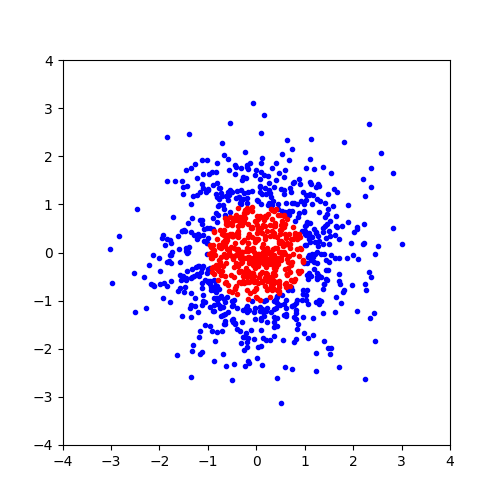

(-4, 4)

In [9]:
plt.figure(figsize=(5,5))
plt.plot(X[0][i], X[1][i],  '.b')
plt.plot(X[0][~i], X[1][~i],  '.r')
plt.ylim(-4, 4)
plt.xlim(-4, 4)

#### Build Model...

In [14]:
# instantiate a ArtificialNeuralNetwork class
ann = ArtificialNeuralNetwork()
# add various layers
ann.add_layer(InputLayer(n_nodes=3, activation='tanh'))
ann.add_layer(HiddenLayer(n_nodes=3, activation='tanh'))
ann.add_layer(LogisticOutputLayer())

#### Fit model to data set...

In [23]:
ann.fit(X, Y, learning_rate=0.05, n_iter=2000)
print('training error: ', ann.error(X, Y))

training error:  0.022


#### Show the Decisions Surface...

<IPython.core.display.Javascript object>


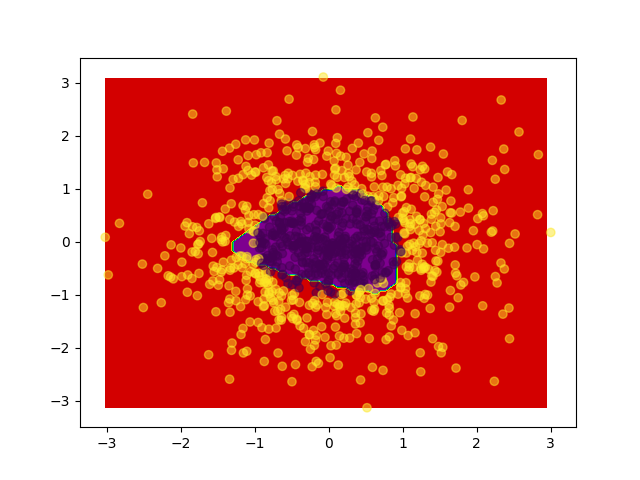

In [17]:
plot_2D_decision_boundary(ann, X, Y)

<IPython.core.display.Javascript object>


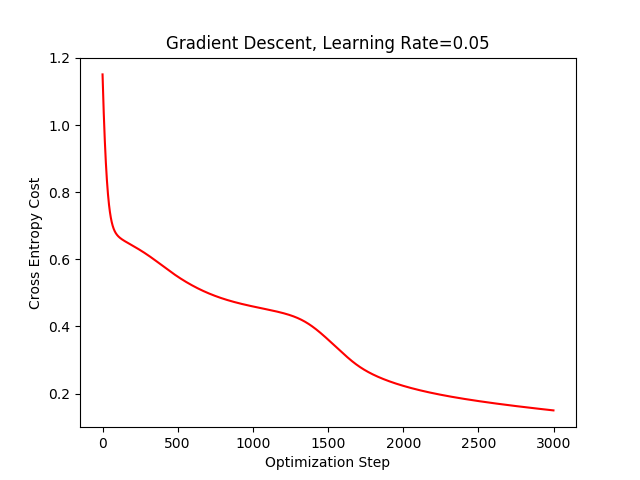

In [18]:
plot_gradient_descent_history(ann)

##### In the cases where the learning rate is too large, one of two flavors of instability can occur... 1. The system seems to converge, with an oscillating error. 2. The system diverges... play with the lr values to observe those behaviors...

## Monitoring Learning and Build Intuition about how Learning Evolves...

In [26]:
# instantiate a ArtificialNeuralNetwork class
ann = ArtificialNeuralNetwork()
# add various layers
ann.add_layer(InputLayer(n_nodes=3, activation='tanh'))
ann.add_layer(HiddenLayer(n_nodes=3, activation='tanh'))
ann.add_layer(LogisticOutputLayer())

training error:  0.221


<IPython.core.display.Javascript object>


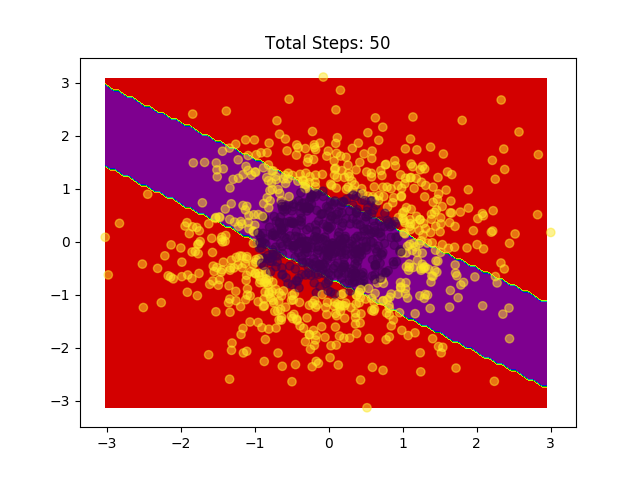

training error:  0.212


<IPython.core.display.Javascript object>


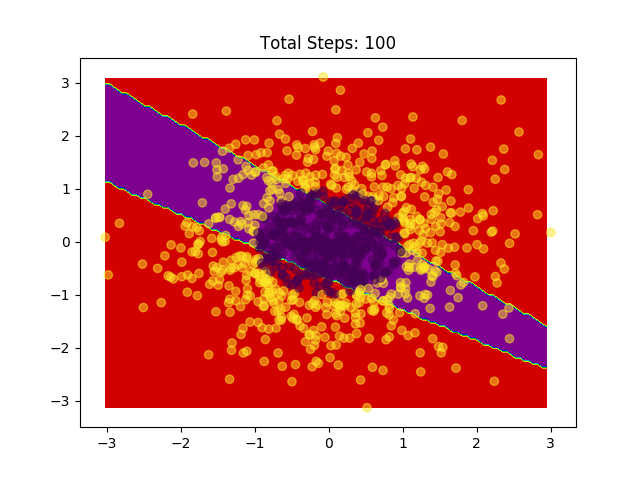

training error:  0.216


<IPython.core.display.Javascript object>


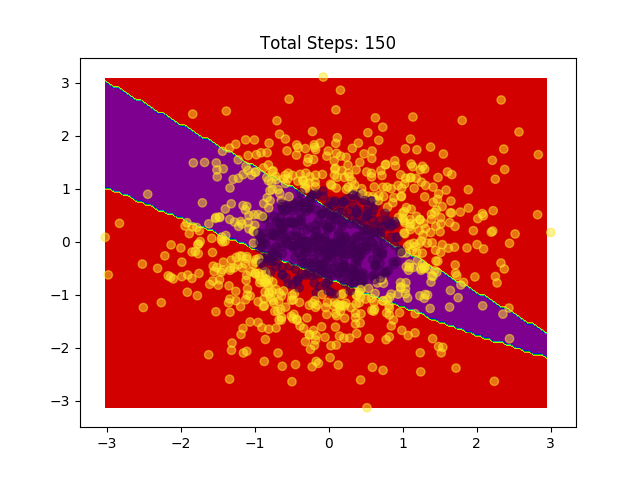

training error:  0.222


<IPython.core.display.Javascript object>


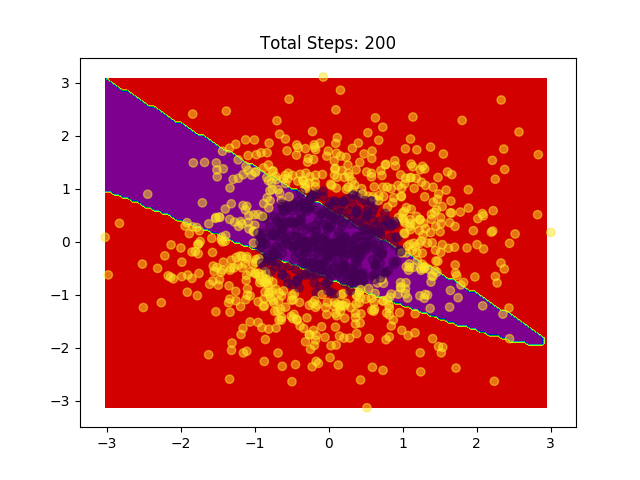

training error:  0.219


<IPython.core.display.Javascript object>


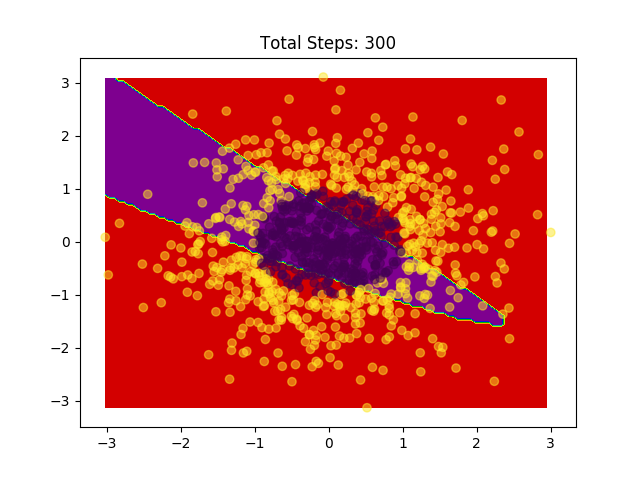

training error:  0.215


<IPython.core.display.Javascript object>


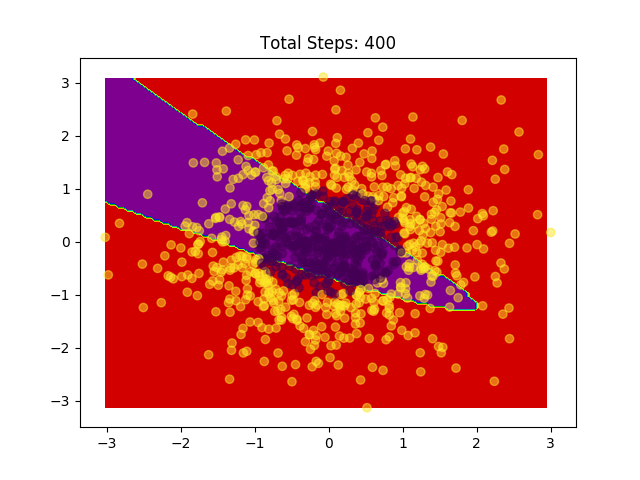

training error:  0.205


<IPython.core.display.Javascript object>


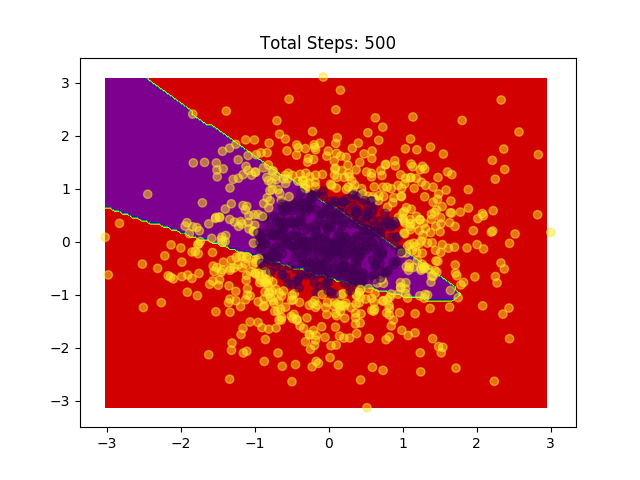

training error:  0.097


<IPython.core.display.Javascript object>


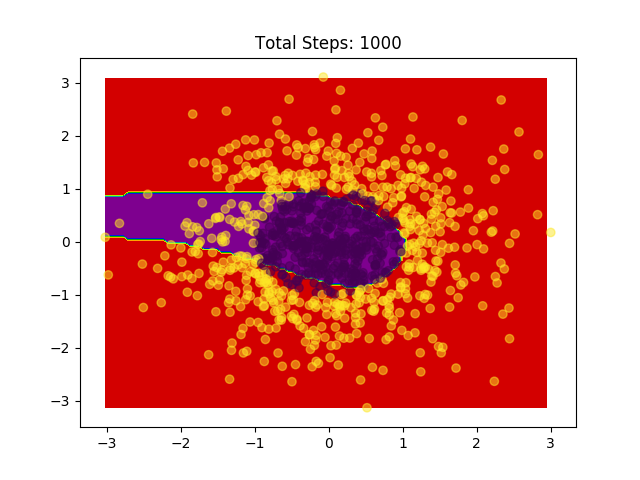

training error:  0.048


<IPython.core.display.Javascript object>


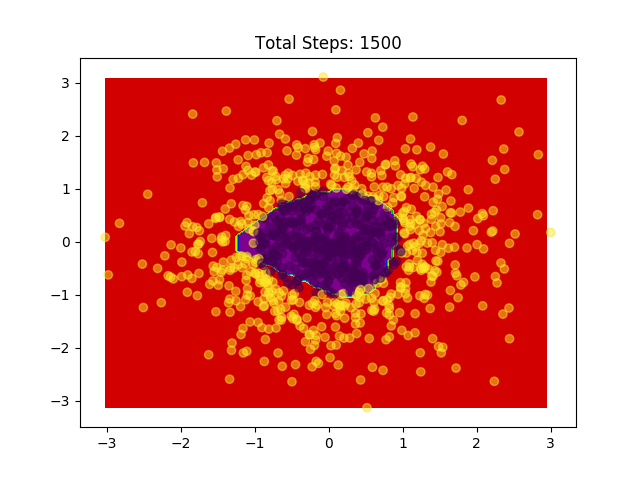

training error:  0.038


<IPython.core.display.Javascript object>


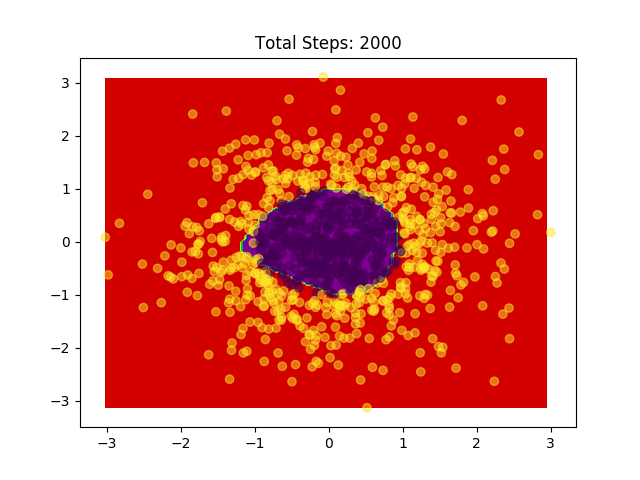

training error:  0.024


<IPython.core.display.Javascript object>


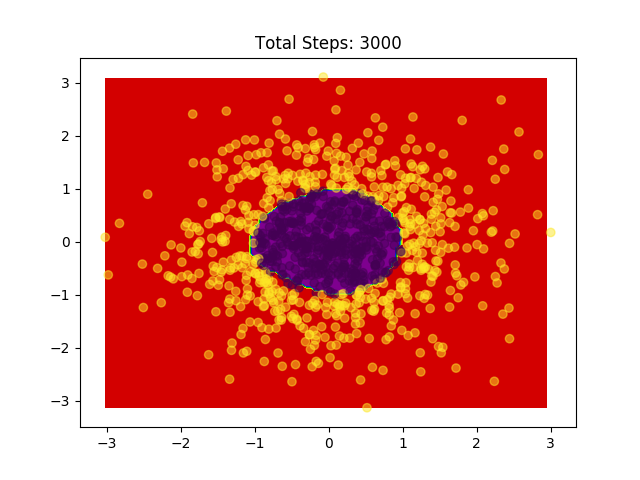

training error:  0.013


<IPython.core.display.Javascript object>


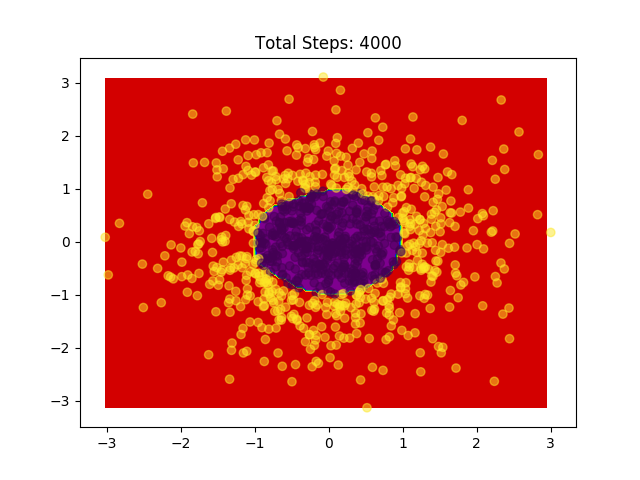

training error:  0.003


<IPython.core.display.Javascript object>


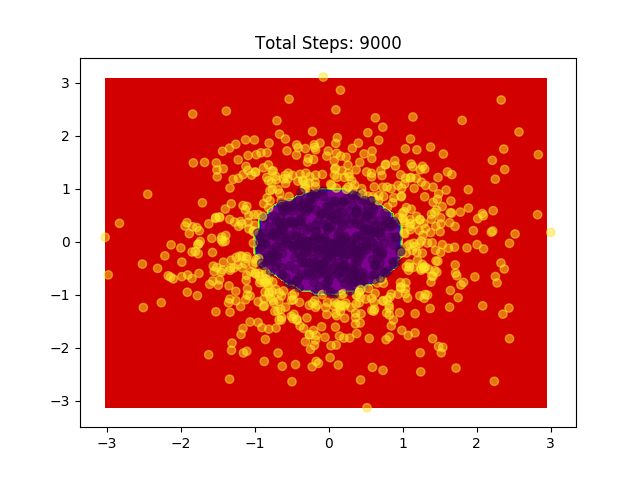

In [28]:
# fit to data...
total_steps = 0
for i in [50, 50, 50, 50, 100, 100, 100, 500, 500, 500, 1000, 1000, 5000]:
    total_steps += i
    ann.fit(X, Y, learning_rate=0.05, n_iter=i)
    print('training error: ', ann.error(X, Y))
    
    plot_2D_decision_boundary(ann, X, Y)
    plt.title('Total Steps: %s' % str(total_steps))